In [1]:
from analysis.svk_data.systems import systems
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
from analysis.ammonia import Ammonia
from analysis.broke_time import broken_systems
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

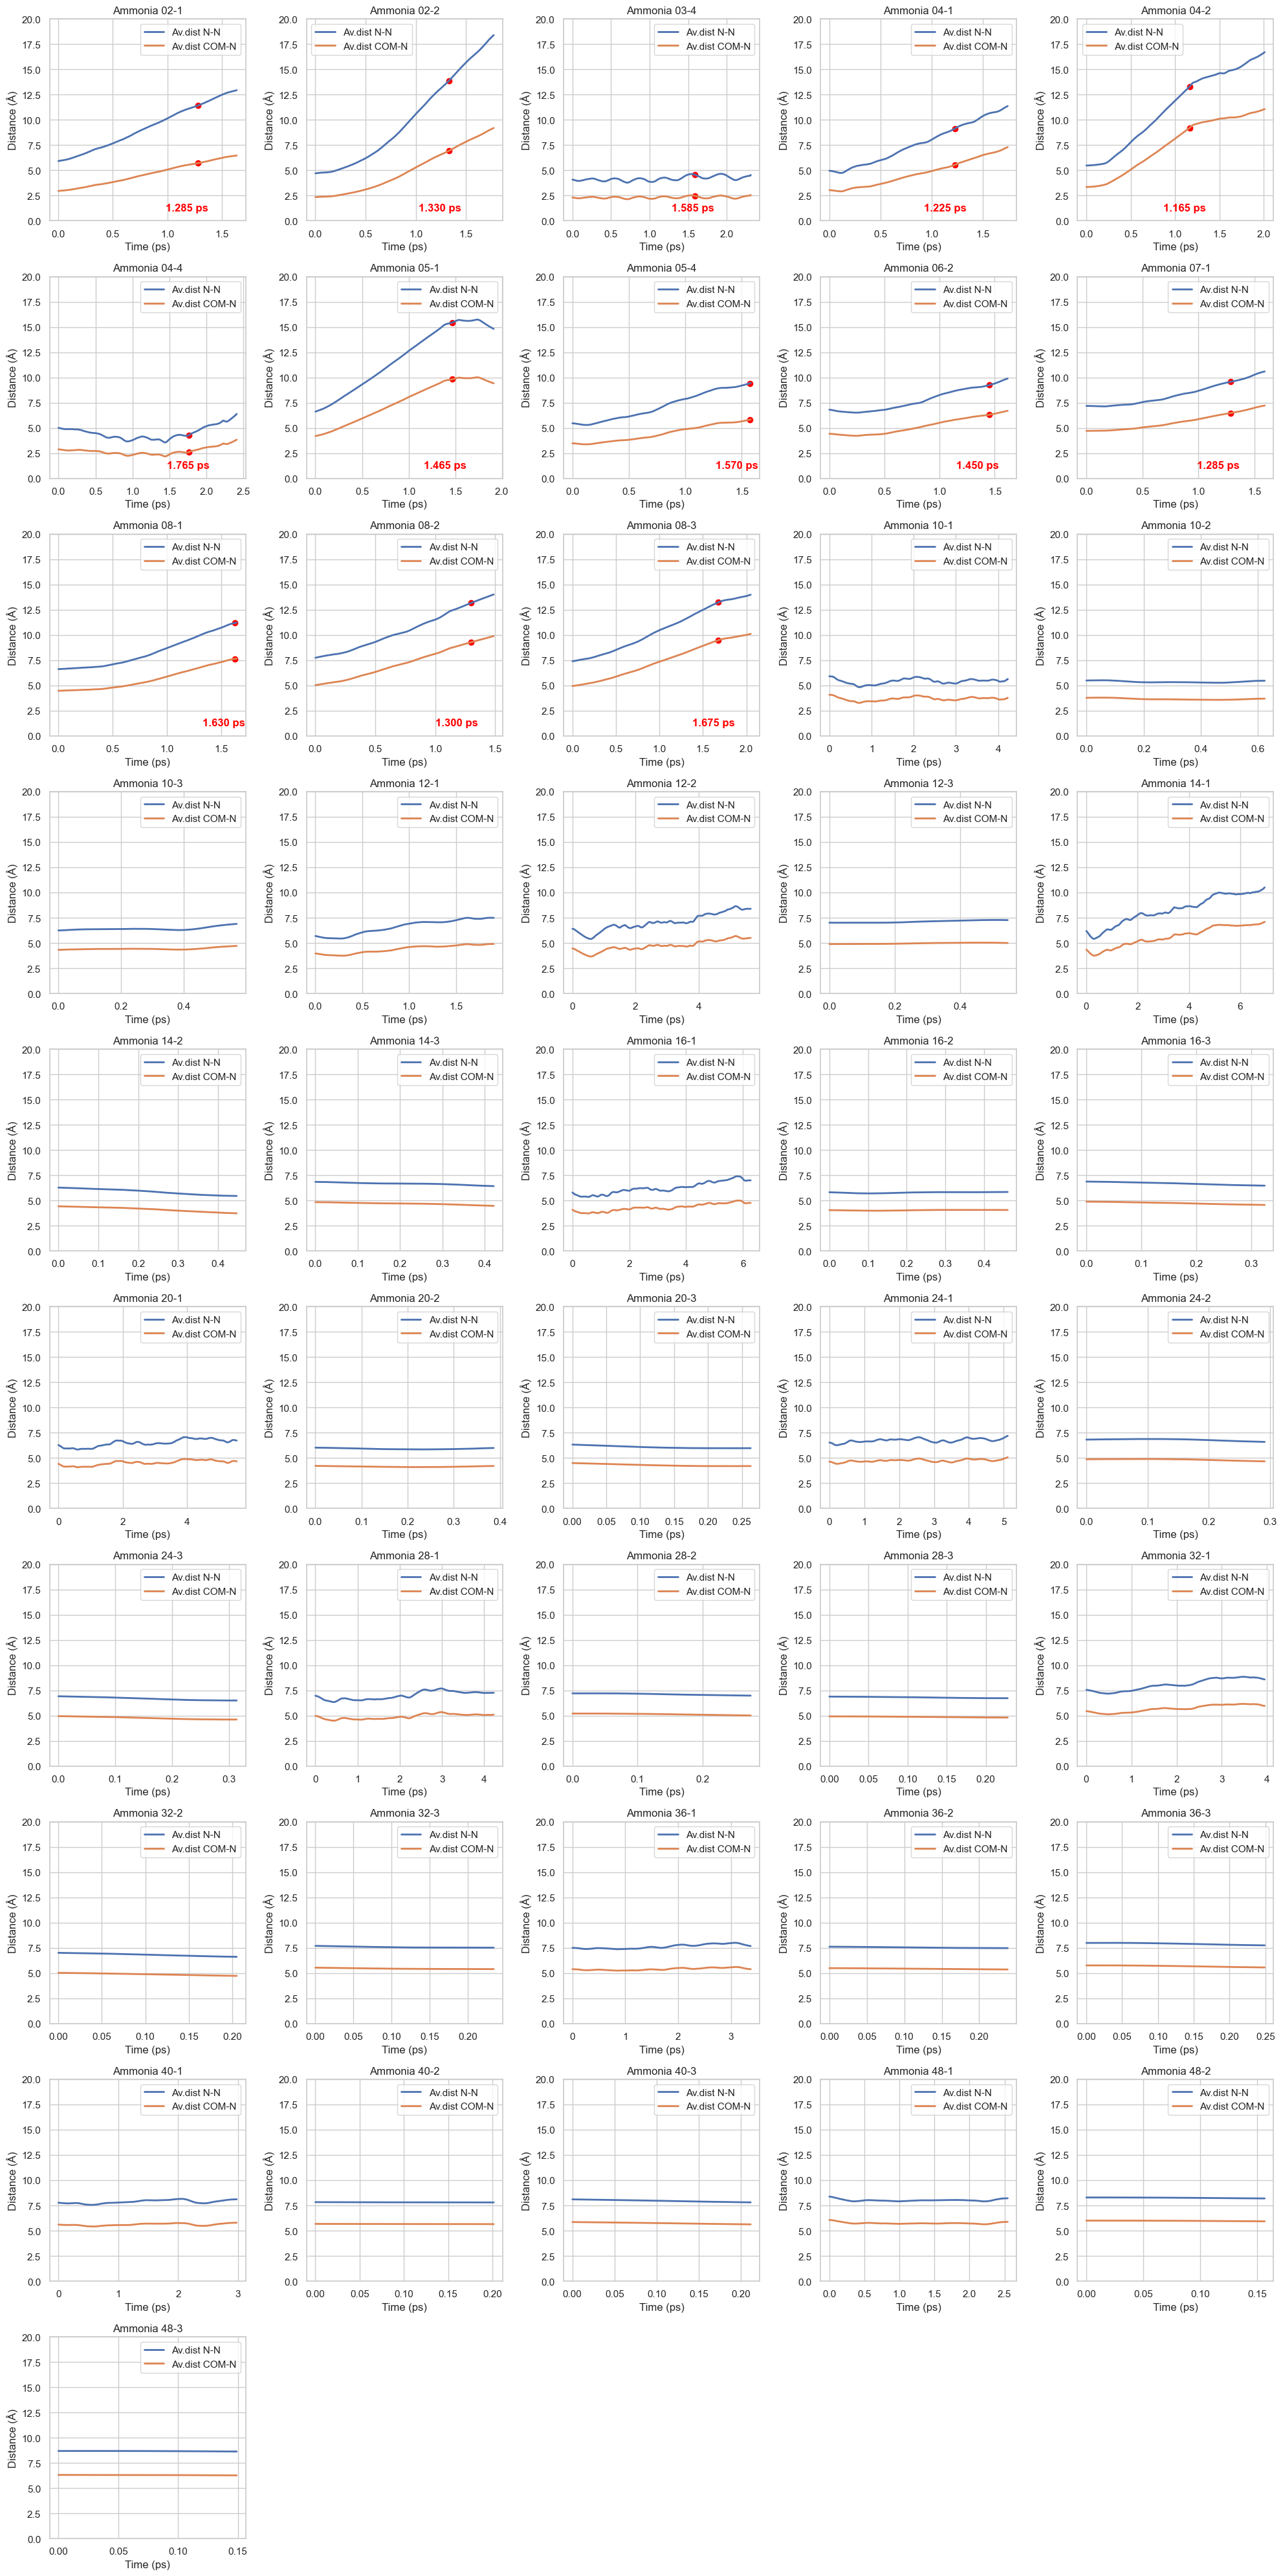

In [17]:
conn = sqlite3.connect('average_distance.db')
data_names = list(systems.keys())

fig, axes = plt.subplots(10, 5, figsize=(20, 40))

for i in range(10):
    for j in range(5):
        ax = axes[i, j]
        index = i * 5 + j
        if index < len(data_names):
            data_name = data_names[index]
            
            query_nn = f'SELECT * FROM nn_ammonia_{data_name}'
            query_cn = f'SELECT * FROM cn_ammonia_{data_name}'

            data_NN = pd.read_sql_query(query_nn, conn)
            data_CN = pd.read_sql_query(query_cn, conn)

            ammonia = Ammonia(data_name, "svk")

            ax.plot(data_NN["step"]/2000, data_NN["distance"], label="Av.dist N-N", lw=2)
            ax.plot(data_CN["step"]/2000, data_CN["distance"], label="Av.dist COM-N", lw=2)
            try:
                ax.scatter(broken_systems[data_name]/2000, data_CN['distance'][broken_systems[data_name]], color='red')
                ax.scatter(broken_systems[data_name]/2000, data_NN['distance'][broken_systems[data_name]], color='red')
                ax.text(broken_systems[data_name]/2000 - 0.3, 1, f'{broken_systems[data_name]/2000:.3f} ps', color='red', weight="bold")
                # ax.plot([broken_systems[data_name]/2000, broken_systems[data_name]/2000], [0, 20], color="red", linestyle='-', lw=1, label="Break up")
            except:
                pass
            ax.set_title(f'Ammonia {systems[data_name].no_ammonia}-{systems[data_name].id_cluster}')
            ax.set_ylim(0, 20)
            ax.set_xlabel('Time (ps)')
            ax.set_ylabel('Distance (Å)')
            ax.legend()
        else:
            ax.set_visible(False)


plt.tight_layout()
plt.savefig("av_dist.pdf", format="pdf", dpi=300)
plt.savefig("av_dist.png", dpi=300)
plt.show()

conn.close()

In [ ]:
# 22

In [ ]:
plt.figure(figsize=(16, 9), dpi=300)

data_name = data_names[1]

conn = sqlite3.connect('average_distance.db')

query_nn = f'SELECT * FROM nn_ammonia_{data_name}'
query_cn = f'SELECT * FROM cn_ammonia_{data_name}'

data_NN = pd.read_sql_query(query_nn, conn)
data_CN = pd.read_sql_query(query_cn, conn)

conn.close()

ammonia = Ammonia(data_name, "svk")

plt.plot(ammonia.load_ener_data()["time"] - 500, data_NN["distance"], label="Average distance NN", lw=3)
plt.plot(ammonia.load_ener_data()["time"] - 500, data_CN["distance"], label="Average distance CN", lw=3)
plt.xlim(-25, 1800)
plt.title(f'Ammonia {data_name}')

plt.ylabel("Distance (Å)", fontsize=22)
plt.xlabel("Simulation time (fs)",fontsize=22)
plt.ylim(1, 19)
plt.tick_params(axis='both', labelsize=20)
plt.legend(loc='upper left', fontsize=20)
# plt.savefig("distances_022.png")
plt.show()

In [ ]:
# 141

In [ ]:
plt.figure(figsize=(16, 9), dpi=300)

data_name = data_names[16]

# print(data_name)

conn = sqlite3.connect('average_distance.db')

query_nn = f'SELECT * FROM nn_ammonia_{data_name}'
query_cn = f'SELECT * FROM cn_ammonia_{data_name}'

data_NN = pd.read_sql_query(query_nn, conn)
data_CN = pd.read_sql_query(query_cn, conn)

conn.close()

ammonia = Ammonia(data_name, "svk")

plt.plot(ammonia.load_ener_data()["time"] - 500, data_NN["distance"], label="Average distance NN", lw=3)
plt.plot(ammonia.load_ener_data()["time"] - 500, data_CN["distance"], label="Average distance CN", lw=3)
plt.xlim(-25, 3800)
plt.title(f'Ammonia {data_name}')

plt.ylabel("Distance (Å)", fontsize=22)
plt.xlabel("Simulation time (fs)",fontsize=22)
plt.ylim(1, 19)
plt.tick_params(axis='both', labelsize=20)
plt.legend(loc='upper left', fontsize=20)
# plt.savefig("distances_141.png")
plt.show()

In [ ]:
# 481

In [ ]:
plt.figure(figsize=(16, 9), dpi=300)

data_name = data_names[24]

conn = sqlite3.connect('average_distance.db')

query_nn = f'SELECT * FROM nn_ammonia_{data_name}'
query_cn = f'SELECT * FROM cn_ammonia_{data_name}'

data_NN = pd.read_sql_query(query_nn, conn)
data_CN = pd.read_sql_query(query_cn, conn)

conn.close()

ammonia = Ammonia(data_name, "svk")

plt.plot(ammonia.load_ener_data()["time"] - 500, data_NN["distance"], label="Average distance NN", lw=3)
plt.plot(ammonia.load_ener_data()["time"] - 500, data_CN["distance"], label="Average distance CN", lw=3)
plt.title(f'Ammonia {data_name}')
plt.xlim(-25, 1500)

plt.ylabel("Distance (Å)", fontsize=22)
plt.xlabel("Simulation time (fs)",fontsize=22)
plt.ylim(1, 19)
plt.tick_params(axis='both', labelsize=20)
plt.legend(loc='upper left', fontsize=20)
# plt.savefig("distances_481.png")
plt.show()